Informatyka Społeczna WH AGH 25.03.2025
## Głębokie uczenie - laboratorium 2

# 1. Problem klasyfikacji binarnej z wykorzystaniem Kerasa


**Klasyfikacja dwuklasowa lub klasyfikacja binarna może być najczęściej stosowanym rodzajem problemu uczenia maszynowego. Celem tego laboratorium jest klasyfikacja recenzji filmów na "pozytywne" i "negatywne", tylko na podstawie zawartości tekstowej recenzji.**


**Zbiór danych IMDB**

Będziemy pracować z zestawem danych IMDB, zestawem 50 000 wysoce spolaryzowanych recenzji z Internet Movie Database. Są one podzielone na 25 000 recenzji do treningu i 25 000 recenzji do testów, przy czym każdy zestaw składa się w 50% z negatywnych i w 50% z pozytywnych recenzji.

Podobnie jak zestaw danych MNIST, zestaw danych IMDB jest dostarczany w pakiecie z Keras.

Został on już wstępnie przetworzony: recenzje (sekwencje słów) zostały przekształcone w sekwencje liczb całkowitych, gdzie każda liczba całkowita oznacza określone słowo w słowniku.

Prosimy o załadowanie zbioru danych z Keras (przy pierwszym uruchomieniu na komputer zostanie pobrane około 80 MB danych):

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Argument `num_words=10000` oznacza, że zachowamy tylko 10 000 najczęściej występujących słów w danych treningowych. Rzadkie słowa zostaną odrzucone. Pozwala nam to na pracę z danymi wektorowymi o rozsądnym rozmiarze.

[ENG] PSI/EAIiIB 2024

**Preparing the data**

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

1. We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in our network a layer capable of handling such integer tensors.
2. We could **one-hot-encode** our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a Dense layer, capable of handling floating-point vector data.

Please implement the **second solution**:

In [ ]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Network architecture

I propose the following architecture choice:

1. Two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review.
2. The intermediate layers will use relu as their “activation function”, and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”, i.e. how likely the review is to be positive).
3. A relu (rectified linear unit) is a function meant to zero-out negative values, while a sigmoid “squashes” arbitrary values into the [0, 1] interval, thus outputting something that can be interpreted as a probability.






In [ ]:
#TODO: Implement the architecture
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

**Network training**

Since we are facing a binary classification problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the binary_crossentropy loss. It isn't the only viable choice: you could use, for instance, mean_squared_error.

But crossentropy is usually the best choice when you are dealing with models that output probabilities. Crossentropy is a quantity from the field of Information Theory, that measures the 'distance' between probability distributions, or in our case, between the ground-truth distribution and our predictions.

To configure the model please use the following parameters:
1. rmsprop optimizer
2. binary_crossentropy loss function
3. accuracy metric


In [ ]:
#TODO: Compile the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Validation**

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a 'validation set' by setting apart 10,000 samples from the original data (suggested split: 25000 train, 10000 validation, 15000 test):

In [ ]:
#TODO: please divide the dataset according to the description above

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model with following parameters:
1. x_train, y_train -remained
2. epochs - 20
3. batch_size - 512
4. validation_data=(x_val, y_val))


In [ ]:
#TODO: Train the model

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6851 - loss: 0.6211 - val_accuracy: 0.8364 - val_loss: 0.4520
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8853 - loss: 0.3867 - val_accuracy: 0.8809 - val_loss: 0.3371
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9125 - loss: 0.2814 - val_accuracy: 0.8871 - val_loss: 0.2953
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9332 - loss: 0.2137 - val_accuracy: 0.8892 - val_loss: 0.2781
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9403 - loss: 0.1834 - val_accuracy: 0.8895 - val_loss: 0.2742
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9542 - loss: 0.1538 - val_accuracy: 0.8809 - val_loss: 0.2955
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9578 - loss: 0.1373 - val_accuracy: 0.8782 - val_loss: 0.3067
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9666 - loss: 0.1143 - val_accuracy: 0.8850 - v

The network should achieve acc: 0.9998 and val_acc: 0.8683.

The model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Please use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy.

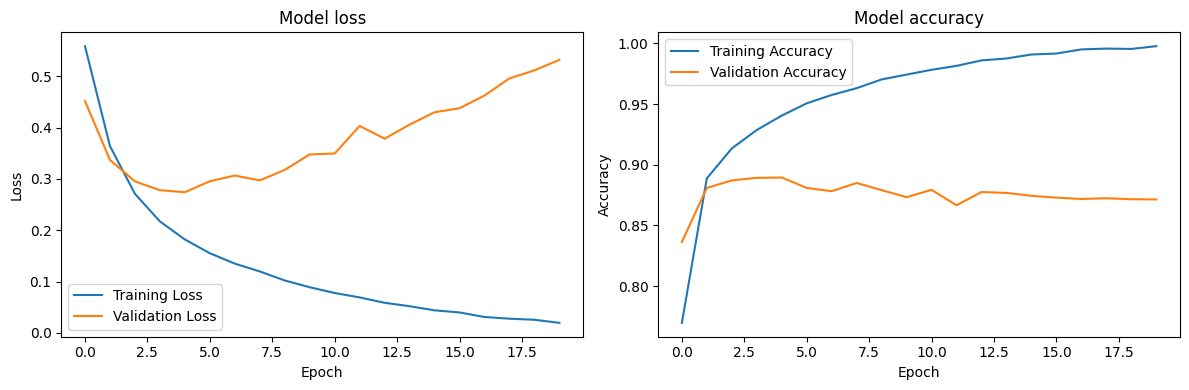

In [ ]:
#TODO: plot

plt.figure(figsize=(12, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='Training Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dict['accuracy'], label='Training Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


 As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. In precise terms, what you are seeing is “overfitting”: after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

Please check how that model performs on the test set too!!

In [ ]:
#TODO: evaluate the results on the test set

results = model.evaluate(x_test, y_test)
print(f"Test loss: {results[0]:.4f}")
print(f"Test accuracy: {results[1]:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8555 - loss: 0.5826
Test loss: 0.5687
Test accuracy: 0.8592
